<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-libraries" data-toc-modified-id="Load-the-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the libraries</a></span></li><li><span><a href="#Visualize-the-image-and-the-histogram" data-toc-modified-id="Visualize-the-image-and-the-histogram-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualize the image and the histogram</a></span></li><li><span><a href="#Thresholding-for-sand" data-toc-modified-id="Thresholding-for-sand-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Thresholding for sand</a></span></li><li><span><a href="#Thresholding-for-rocks-and-bedrock" data-toc-modified-id="Thresholding-for-rocks-and-bedrock-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Thresholding for rocks and bedrock</a></span></li><li><span><a href="#Useful-functions" data-toc-modified-id="Useful-functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Useful functions</a></span></li></ul></div>

# Load the libraries

In [2]:
import cv2
import matplotlib.pyplot as plt

# Visualize the image and the histogram

In [6]:
image = cv2.imread("images/cv_test_images_1.png")
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

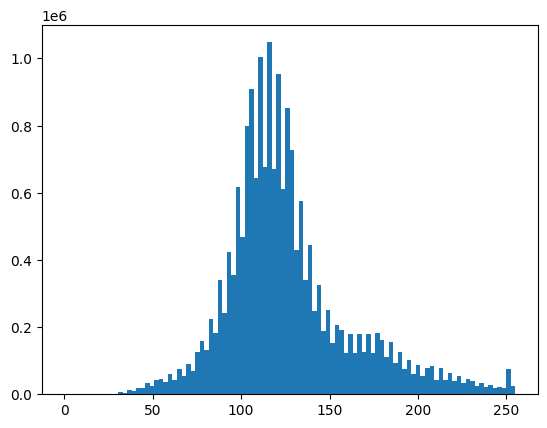

In [3]:
# plot the histogram of the image
plt.hist(img.flat, bins=100, range=(0,255));

# Thresholding for sand

threshold value 147


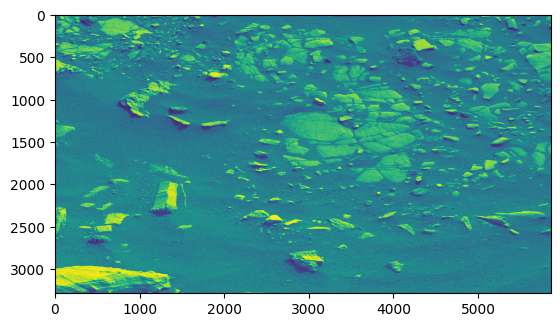

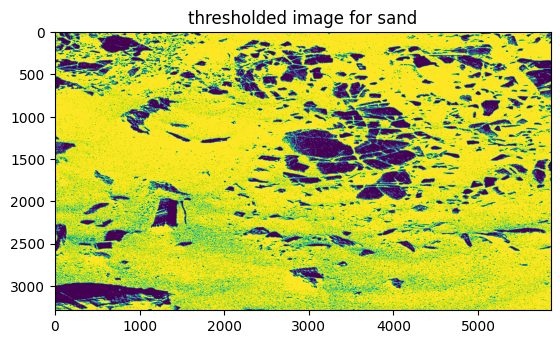

In [4]:
from skimage.filters import threshold_otsu

threshold = threshold_otsu(img)
print("threshold value",threshold)
#Generate thresholded image
thresholded_img = img < threshold
plt.imshow(img)
plt.show()
plt.imshow(thresholded_img)
plt.title("thresholded image for sand")
plt.show()

[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


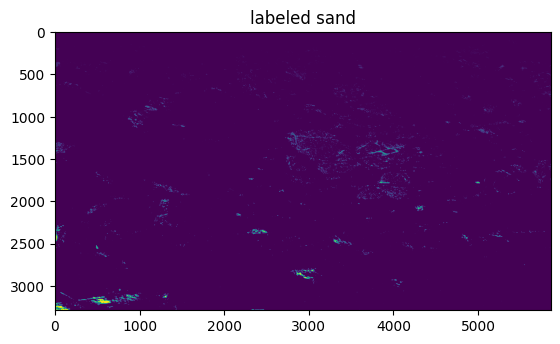

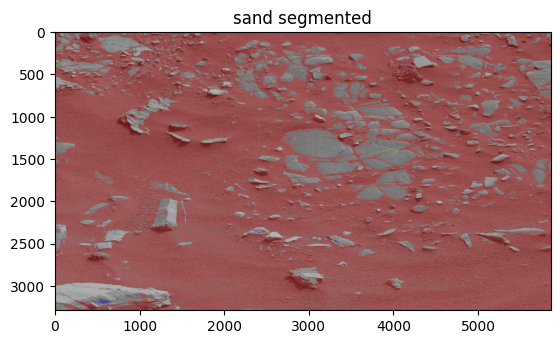

In [5]:
# label the objects and overlap it on the original image
from skimage import measure
from skimage.color import label2rgb, rgb2gray

label_image = measure.label(thresholded_img, connectivity=img.ndim)
print(thresholded_img)
plt.imshow(label_image)
plt.title("labeled sand")
plt.show()
image_label_overlay = label2rgb(label_image, image=img)
plt.imshow(image_label_overlay)
plt.title("sand segmented")
plt.show()
plt.imsave("results/thresholding/segmented_sand_using_threshold.jpg", image_label_overlay) 

# Thresholding for rocks and bedrock

threshold value 147


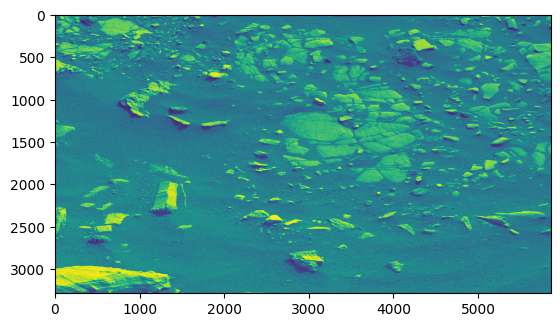

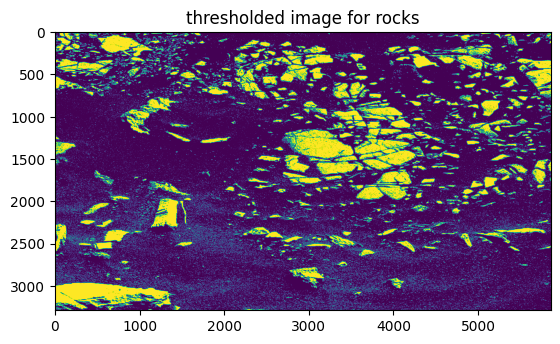

In [6]:
from skimage.filters import threshold_otsu

threshold = threshold_otsu(img)
print("threshold value",threshold)
#Generate thresholded image
thresholded_img = img > threshold
plt.imshow(img)
plt.show()
plt.imshow(thresholded_img)
plt.title("thresholded image for rocks")
plt.show()

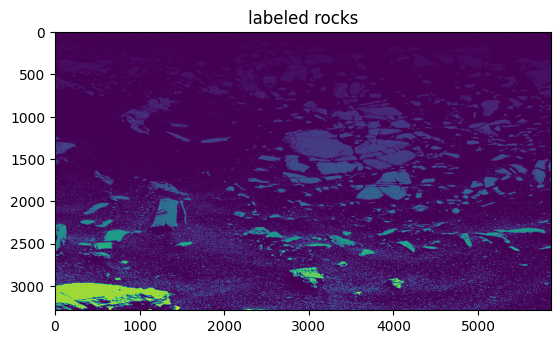

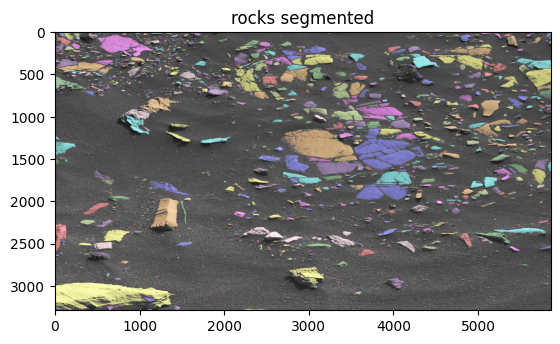

In [7]:
# label the objects and overlap it on the original image
from skimage import measure
from skimage.color import label2rgb, rgb2gray

label_image = measure.label(thresholded_img, connectivity=img.ndim)
plt.imshow(label_image)
plt.title("labeled rocks")
plt.show()
image_label_overlay = label2rgb(label_image, image=img)
plt.imshow(image_label_overlay)
plt.title("rocks segmented")
plt.show()
plt.imsave("results/thresholding/segmented_rocks_using_threshold.jpg", image_label_overlay) 

# Useful functions

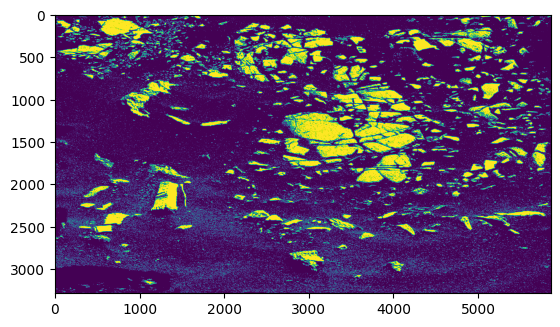

In [8]:
#Remove edge touching regions
from skimage.segmentation import clear_border
edge_touching_removed = clear_border(thresholded_img)
plt.imshow(edge_touching_removed)

In [ ]:
# thresholding function in cv2
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY+cv2.THRESH_OTSU)

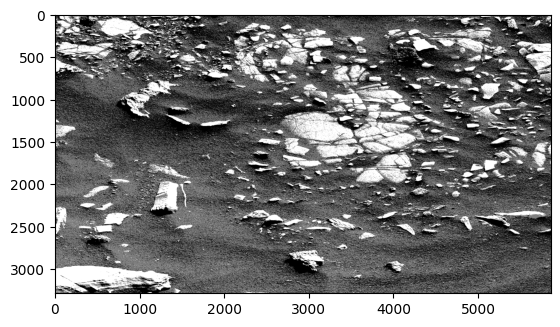

In [9]:
# to segment all the three classes
# this function does not work effectively in segmenting rocks from bedrocks
from skimage.filters import threshold_multiotsu
import numpy as np

thresholds = threshold_multiotsu(img, classes=3)
regions = np.digitize(img, bins=thresholds)
plt.imshow(regions, cmap = 'gray')